In [ ]:
# album chart scraping

import pandas as pd
import requests
import time

if __name__ == '__main__':
    url = "https://circlechart.kr/data/api/chart/album"
    cur_url = "circlechart.kr/page_chart/album.circle?nationGbn=T&targetTime={}&hitYear={}&termGbn=year&yearTime=3"
    
    my_headers = {
        "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36",
    }
    
    my_data = {
        "nationGbn": "T",
        "termGbn": "year",
        "hitYear": 2012,
        "targetTime": 2012,
        "yearTime": 3,
        "curUrl": cur_url
    }
    
    albums = []
    
    for year in range(2012, 2018):
        print(year)
        my_data["hitYear"] = year
        my_data["targetTime"] = year
        my_data["curUrl"] = cur_url.format(year, year)
        
        response = requests.post(url, headers=my_headers, data=my_data)
        page_json = response.json()
        # print(page_json)
        for key in page_json["List"].keys():
            album = page_json["List"][key]
            albums.append({
                "year": year,
                "rank": album["SERVICE_RANKING"],
                "album_name": album["ALBUM_NAME"],
                "artist_name": album["ARTIST_NAME"],
                "sales": album["Album_CNT"]
            })
            
        time.sleep(3)
    
    pd.DataFrame(albums).to_excel("albums.xlsx", index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
idols = pd.read_csv("new_idol2.csv")
idols

,Name,Birth Date,Group,Height,Weight,Gener,Height_avg,Weight_avg,Members
0,2Soul,1997-09-10,7 O'clock,172,55,M,177,60,4
1,Hyun,1997-08-25,7 O'clock,176,58,M,177,60,4
2,Jeonggyu,1997-11-05,7 O'clock,181,62,M,177,60,4
3,Rui,2000-03-07,7 O'clock,178,63,M,177,60,4
4,A-min,2004-05-22,EPEX,175,54,M,180,61,8
...,...,...,...,...,...,...,...,...,...
264,Yoshi,2000-05-15,Treasure,179,59,M,179,59,1
265,Yubin,2002-02-27,Bling Bling,166,47,F,166,47,1
266,Yue,2004-07-03,Lapillus,163,48,F,163,48,1
267,Yuji,1998-11-25,3YE,160,45,F,160,45,1


In [3]:
albums = pd.read_excel("albums.xlsx")
albums

,year,rank,album_name,artist_name,sales
0,2012,1,"Sexy, Free & Single",슈퍼주니어 (Super Junior),356431
1,2012,2,Alive,BIGBANG (빅뱅),266848
2,2012,11,버스커 버스커 1집,버스커 버스커 (Busker Busker),136234
3,2012,12,Tarantallegra,XIA (준수),127620
4,2012,13,`SPY` The 6th Album Repackage,슈퍼주니어 (Super Junior),124191
...,...,...,...,...,...
595,2017,96,First Mini Album `Burning Sensation`,SF9 (에스에프나인),33997
596,2017,97,Don`t Say No - The 1st Mini Album,서현 (SEOHYUN),33369
597,2017,98,2 Cool 4 Skool,방탄소년단,33008
598,2017,99,the.the.the,용국 & 시현,32935


In [ ]:
data = albums.merge(idols, left_on = "artist_name", right_on = "Group")
data["age"] = data["year"] - data["Birth Date"].apply(
    lambda x: int(x.split("-")[0]))
data


,year,rank,album_name,artist_name,sales,Name,Birth Date,Group,Height,Weight,Gener,Height_avg,Weight_avg,Members,age
0,2012,21,`Electric Shock` The 2nd Mini Album,f(x),74694,Victoria,1987-02-02,f(x),168,45,F,168,45,1,25
1,2012,97,`Hot Summer` f(x) 1st Album Repackage,f(x),15309,Victoria,1987-02-02,f(x),168,45,F,168,45,1,25
2,2013,28,Pink Tape,f(x),81825,Victoria,1987-02-02,f(x),168,45,F,168,45,1,26
3,2014,19,Red Light,f(x),86143,Victoria,1987-02-02,f(x),168,45,F,168,45,1,27
4,2015,33,4 Walls - The 4th Album,f(x),75625,Victoria,1987-02-02,f(x),168,45,F,168,45,1,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,2014,79,사뿐사뿐,AOA,20179,Yookyung,1993-03-15,AOA,167,48,F,167,48,1,21
581,2014,97,단발머리,AOA,14869,Yookyung,1993-03-15,AOA,167,48,F,167,48,1,21
582,2015,57,Heart Attack,AOA,42164,Yookyung,1993-03-15,AOA,167,48,F,167,48,1,22
583,2016,69,Good Luck,AOA,40282,Yookyung,1993-03-15,AOA,167,48,F,167,48,1,23


In [6]:
def plot_line(xs, ys, labels=[""], xlabel="", ylabel="", title=""):
    plt.figure(figsize = (4, 2.5), dpi=300)
    for i in range(len(xs)):
        plt.plot(xs[i], ys[i], label=labels[i])
    plt.tick_params(labelsize=4)
    plt.xlabel(xlabel, fontsize=6)
    plt.ylabel(ylabel, fontsize=6)
    plt.title(title, fontsize=8)
    if len(labels) > 1:
        plt.legend(fontsize=6)
    plt.savefig("images/" + title + ".png")
    plt.show()

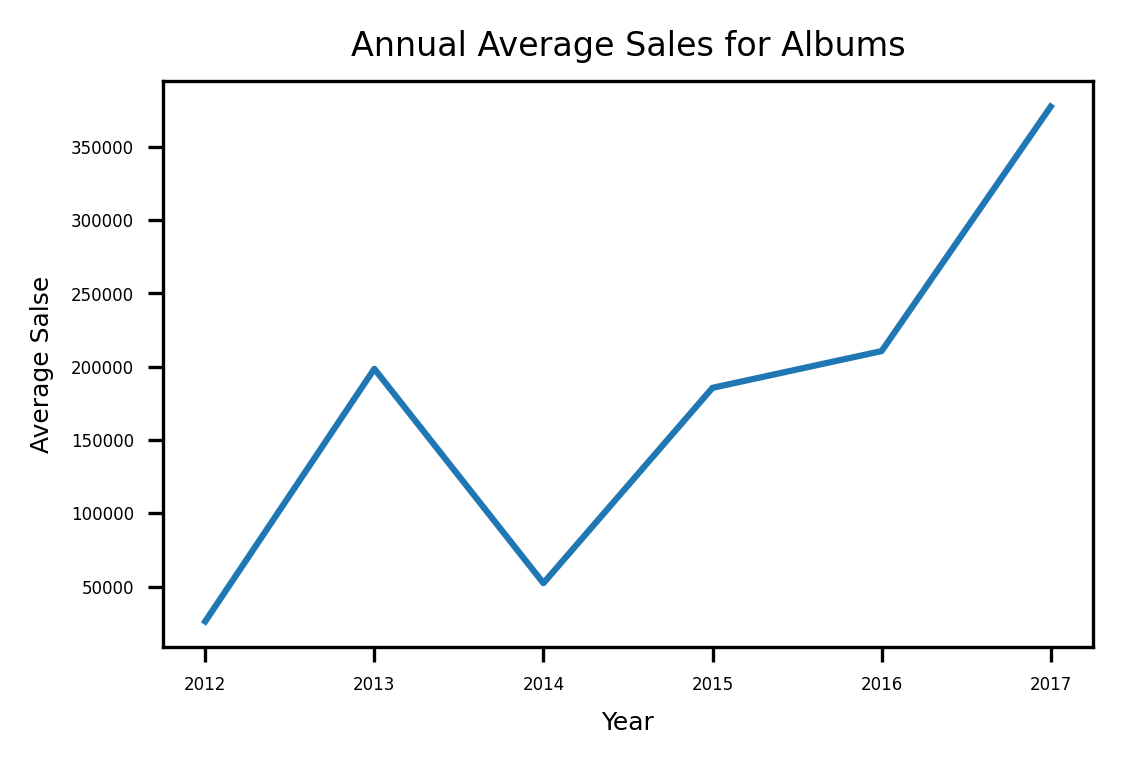

In [7]:
annual_sales = data.groupby("year")["sales"].mean().reset_index()
plot_line(
    [annual_sales["year"]], [annual_sales["sales"]], 
    xlabel="Year", ylabel="Average Salse",
    title = "Annual Average Sales for Albums"
)

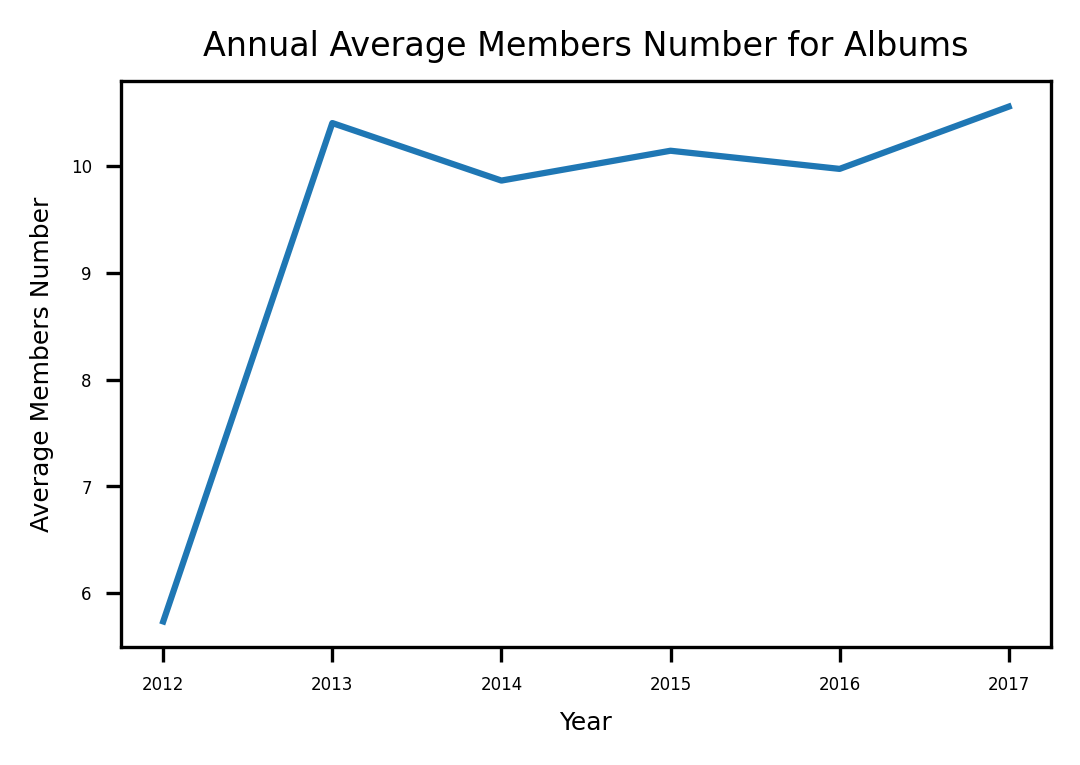

In [8]:
annual_member = data.groupby("year")["Members"].mean().reset_index()
plot_line(
    [annual_member["year"]], [annual_member["Members"]], 
    xlabel="Year", ylabel="Average Members Number",
    title = "Annual Average Members Number for Albums"
)

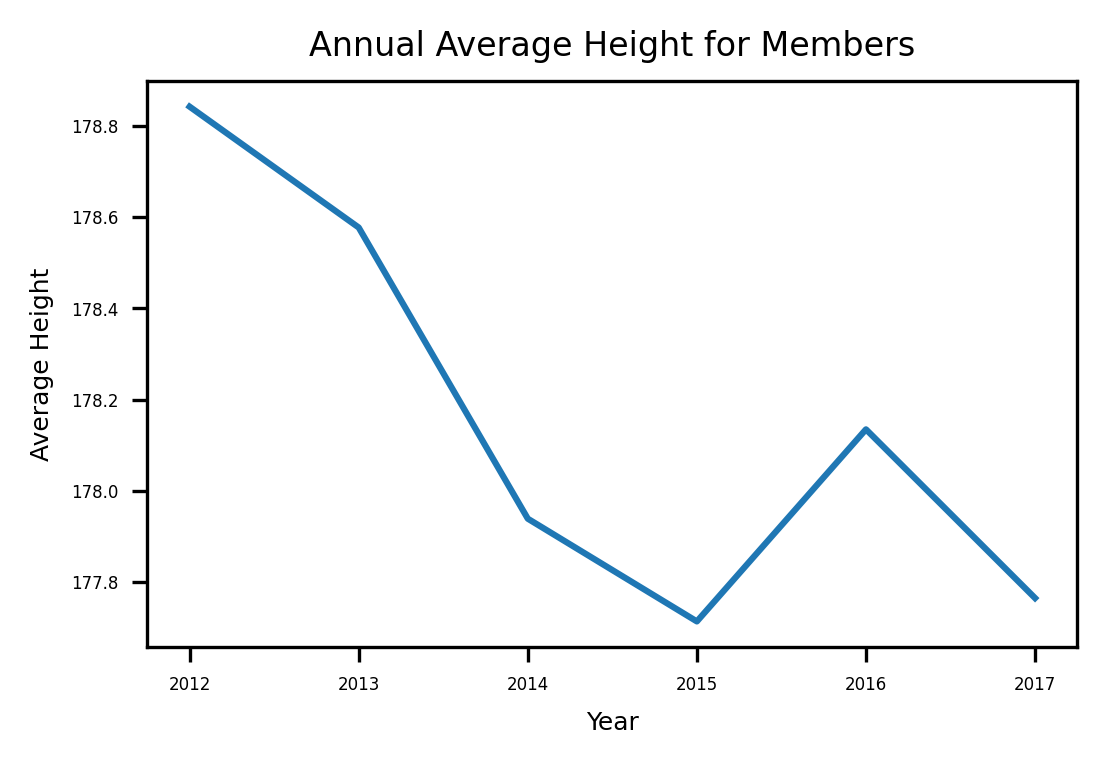

In [9]:
annual_height = data.groupby("year")["Height"].mean().reset_index()
plot_line(
    [annual_height["year"]], [annual_height["Height"]], 
    xlabel="Year", ylabel="Average Height",
    title = "Annual Average Height for Members"
)

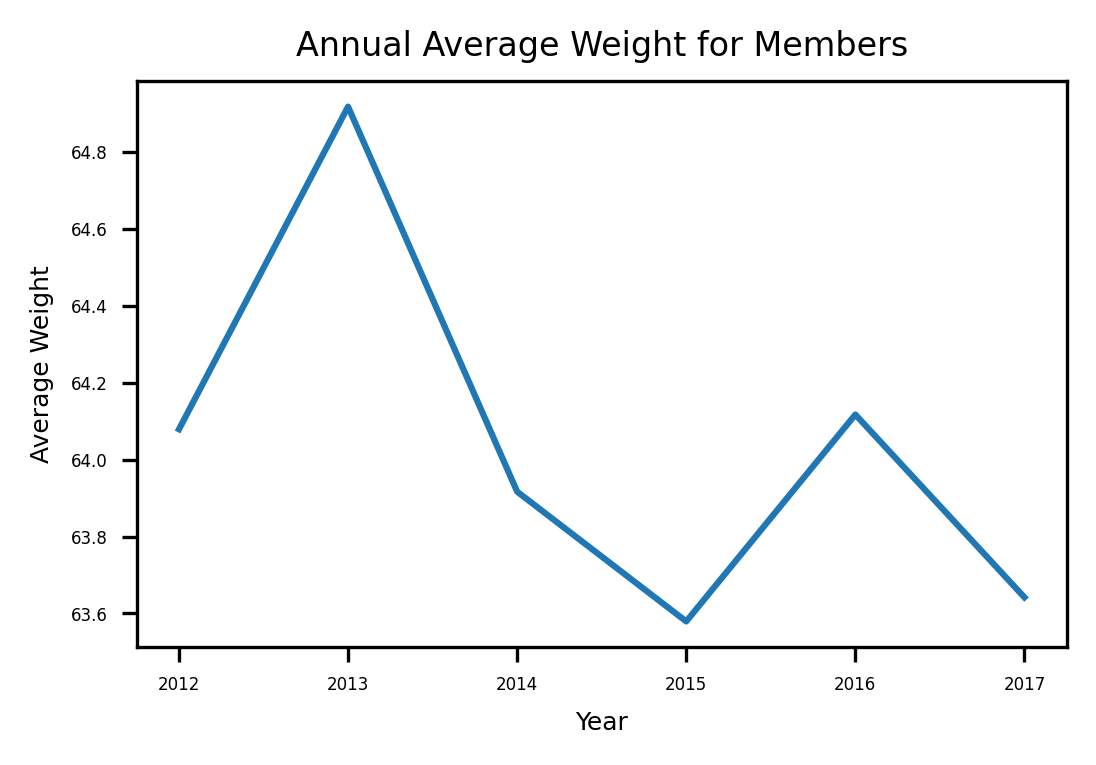

In [10]:
annual_weight = data.groupby("year")["Weight"].mean().reset_index()
plot_line(
    [annual_weight["year"]], [annual_weight["Weight"]], 
    xlabel="Year", ylabel="Average Weight",
    title = "Annual Average Weight for Members"
)

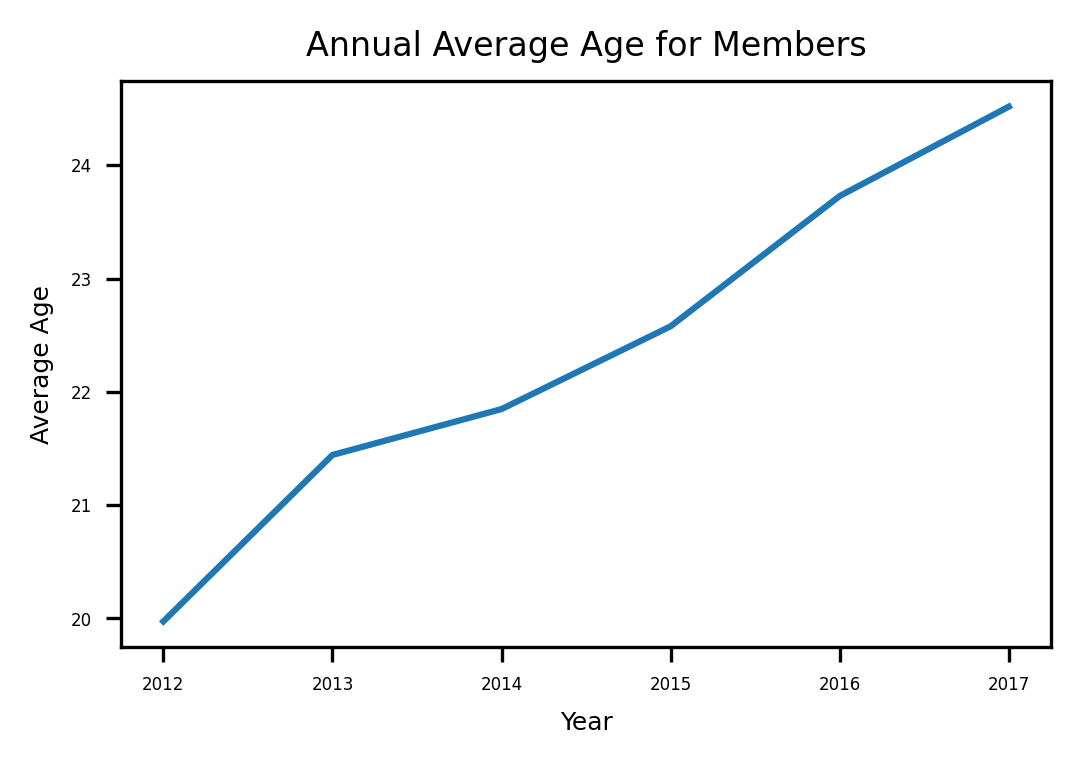

In [11]:
annual_age = data.groupby("year")["age"].mean().reset_index()
plot_line(
    [annual_age["year"]], [annual_age["age"]], 
    xlabel="Year", ylabel="Average Age",
    title = "Annual Average Age for Members"
)

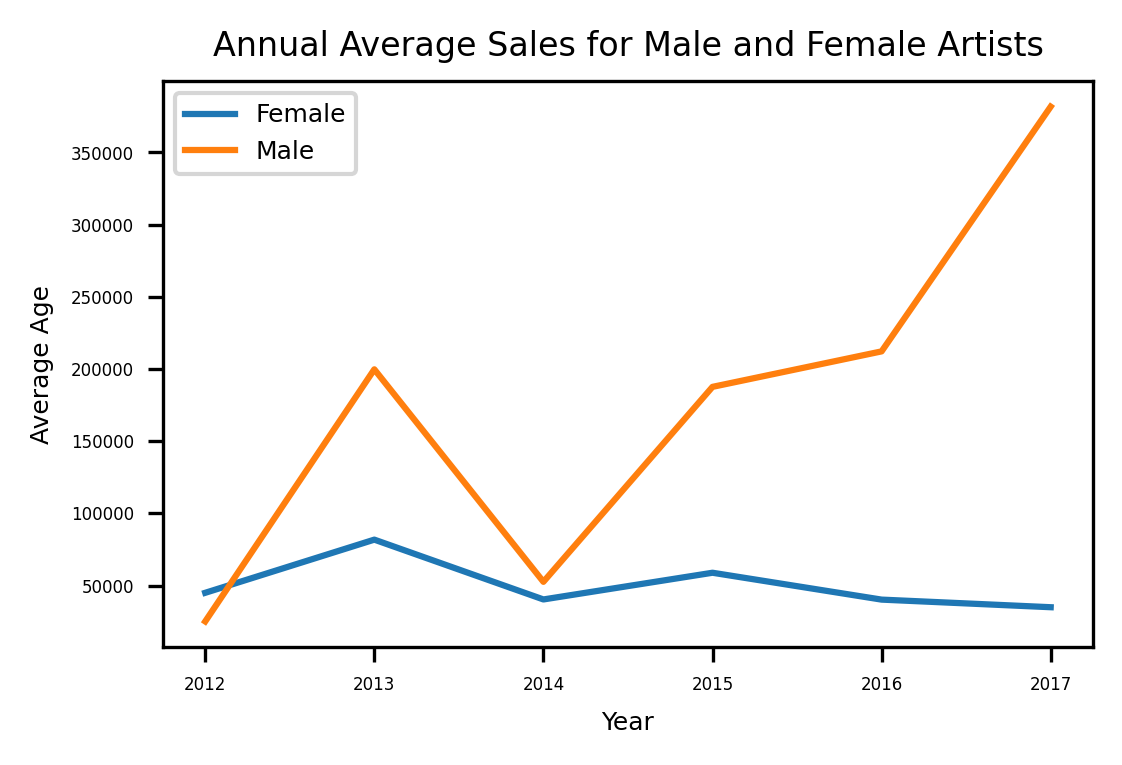

In [12]:
gender_sales = data.groupby(
    ["year", "Gener"]
)["sales"].mean().reset_index()
plot_line(
    [
        gender_sales.loc[gender_sales["Gener"] == "F", "year"],
        gender_sales.loc[gender_sales["Gener"] == "M", "year"]
    ],    
    [
        gender_sales.loc[gender_sales["Gener"] == "F", "sales"],
        gender_sales.loc[gender_sales["Gener"] == "M", "sales"]
    ],  
    labels=["Female", "Male"], xlabel="Year", ylabel="Average Sales",
    title = "Annual Average Sales for Male and Female Artists"
)

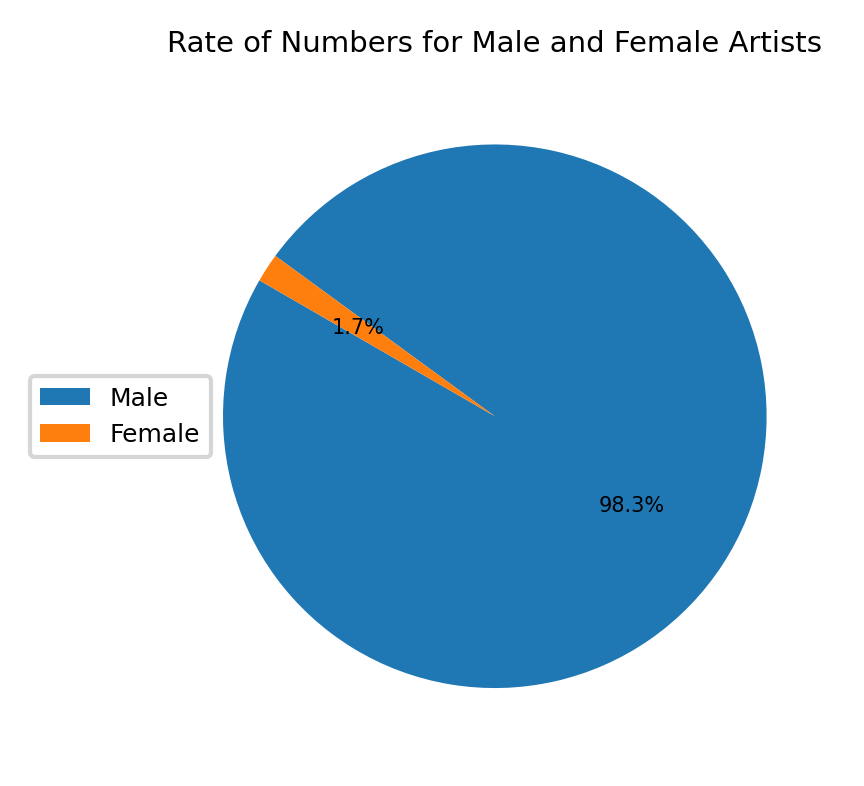

In [13]:
gender_num = data["Gener"].value_counts().reset_index()
plt.figure(figsize=(3, 3), dpi=300)
patches, l_text, p_text = plt.pie(
    gender_num["Gener"], autopct='%1.1f%%', shadow=False, startangle=150
)
for t in p_text:
    t.set_size(5)
plt.legend(
    patches, ["Male", "Female"], fontsize=6, 
    title="", loc="center right", bbox_to_anchor=(0, 0, 0.1, 1)
)
plt.title("Rate of Numbers for Male and Female Artists", fontsize=7)
plt.savefig("images/Rate of Numbers for Male and Female Artists.png")
plt.show()

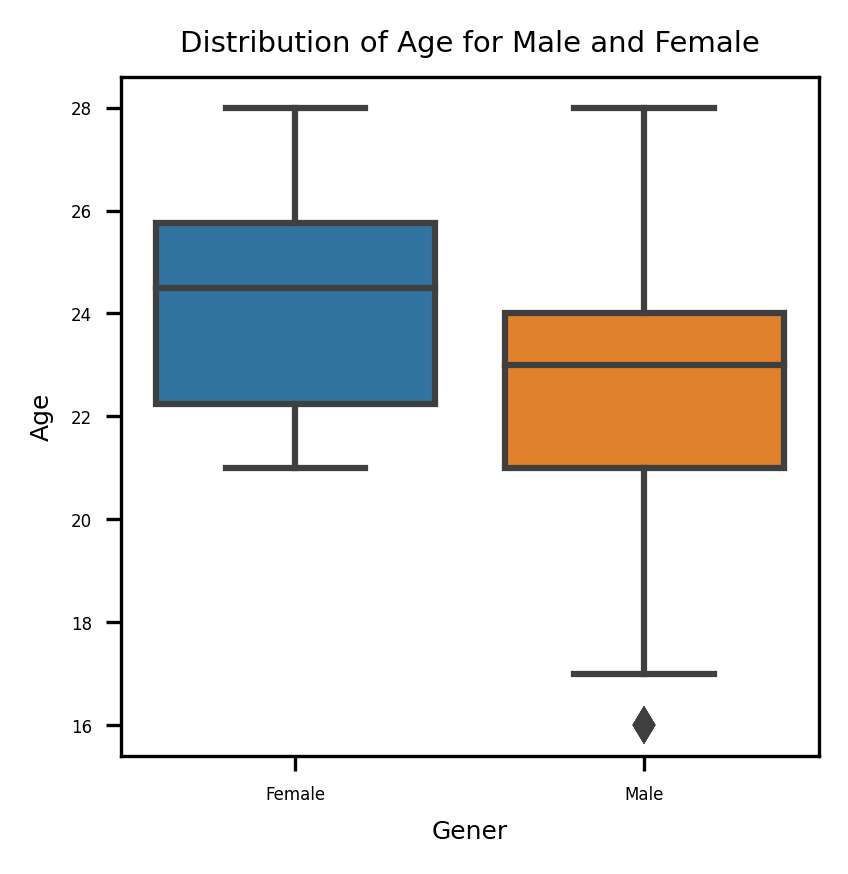

In [14]:
plt.figure(figsize=(3, 3), dpi=300)
sns.boxplot(x="Gener", y="age", data=data)
plt.title("Distribution of Age for Male and Female", fontsize=7)
plt.tick_params(labelsize=4)
plt.xlabel("Gener", fontsize=6)
plt.ylabel("Age", fontsize=6)
plt.xticks([0, 1], ["Female", "Male"])
plt.savefig("images/Distribution of Age for Male and Female.png")
plt.show()

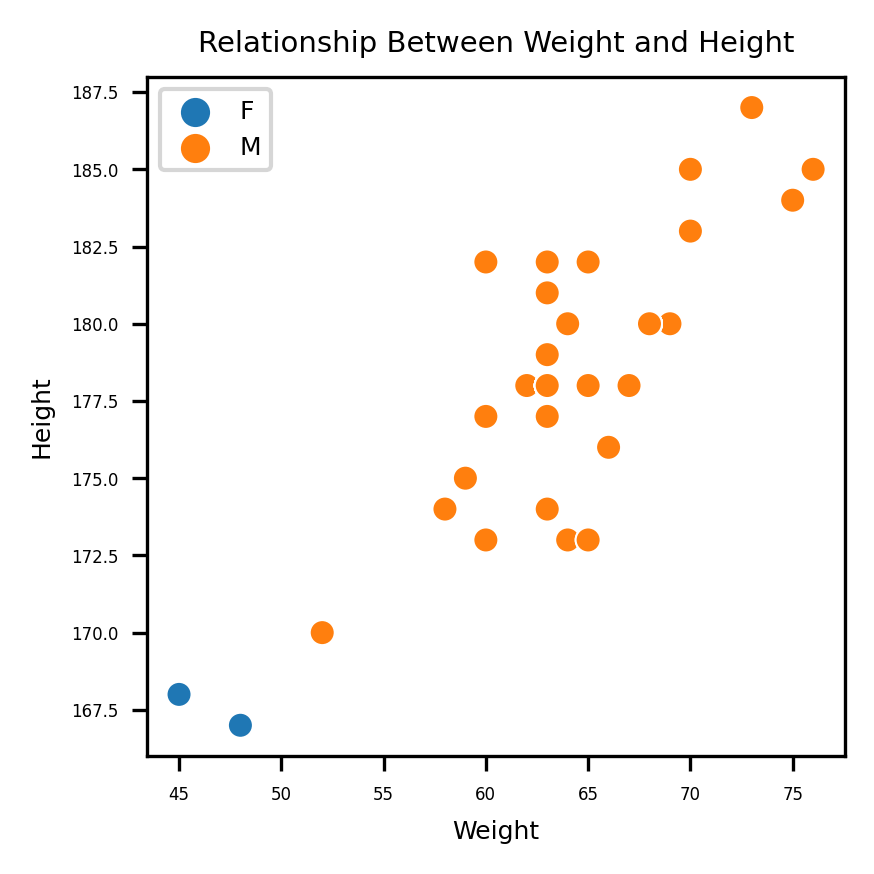

In [15]:
plt.figure(figsize=(3, 3), dpi=300)
sns.scatterplot(x="Weight", y="Height", hue="Gener", data=data)
plt.title("Relationship Between Weight and Height", fontsize=7)
plt.tick_params(labelsize=4)
plt.xlabel("Weight", fontsize=6)
plt.ylabel("Height", fontsize=6)
plt.legend(fontsize=6)
plt.savefig("images/Relationship Between Weight and Height.png")
plt.show()

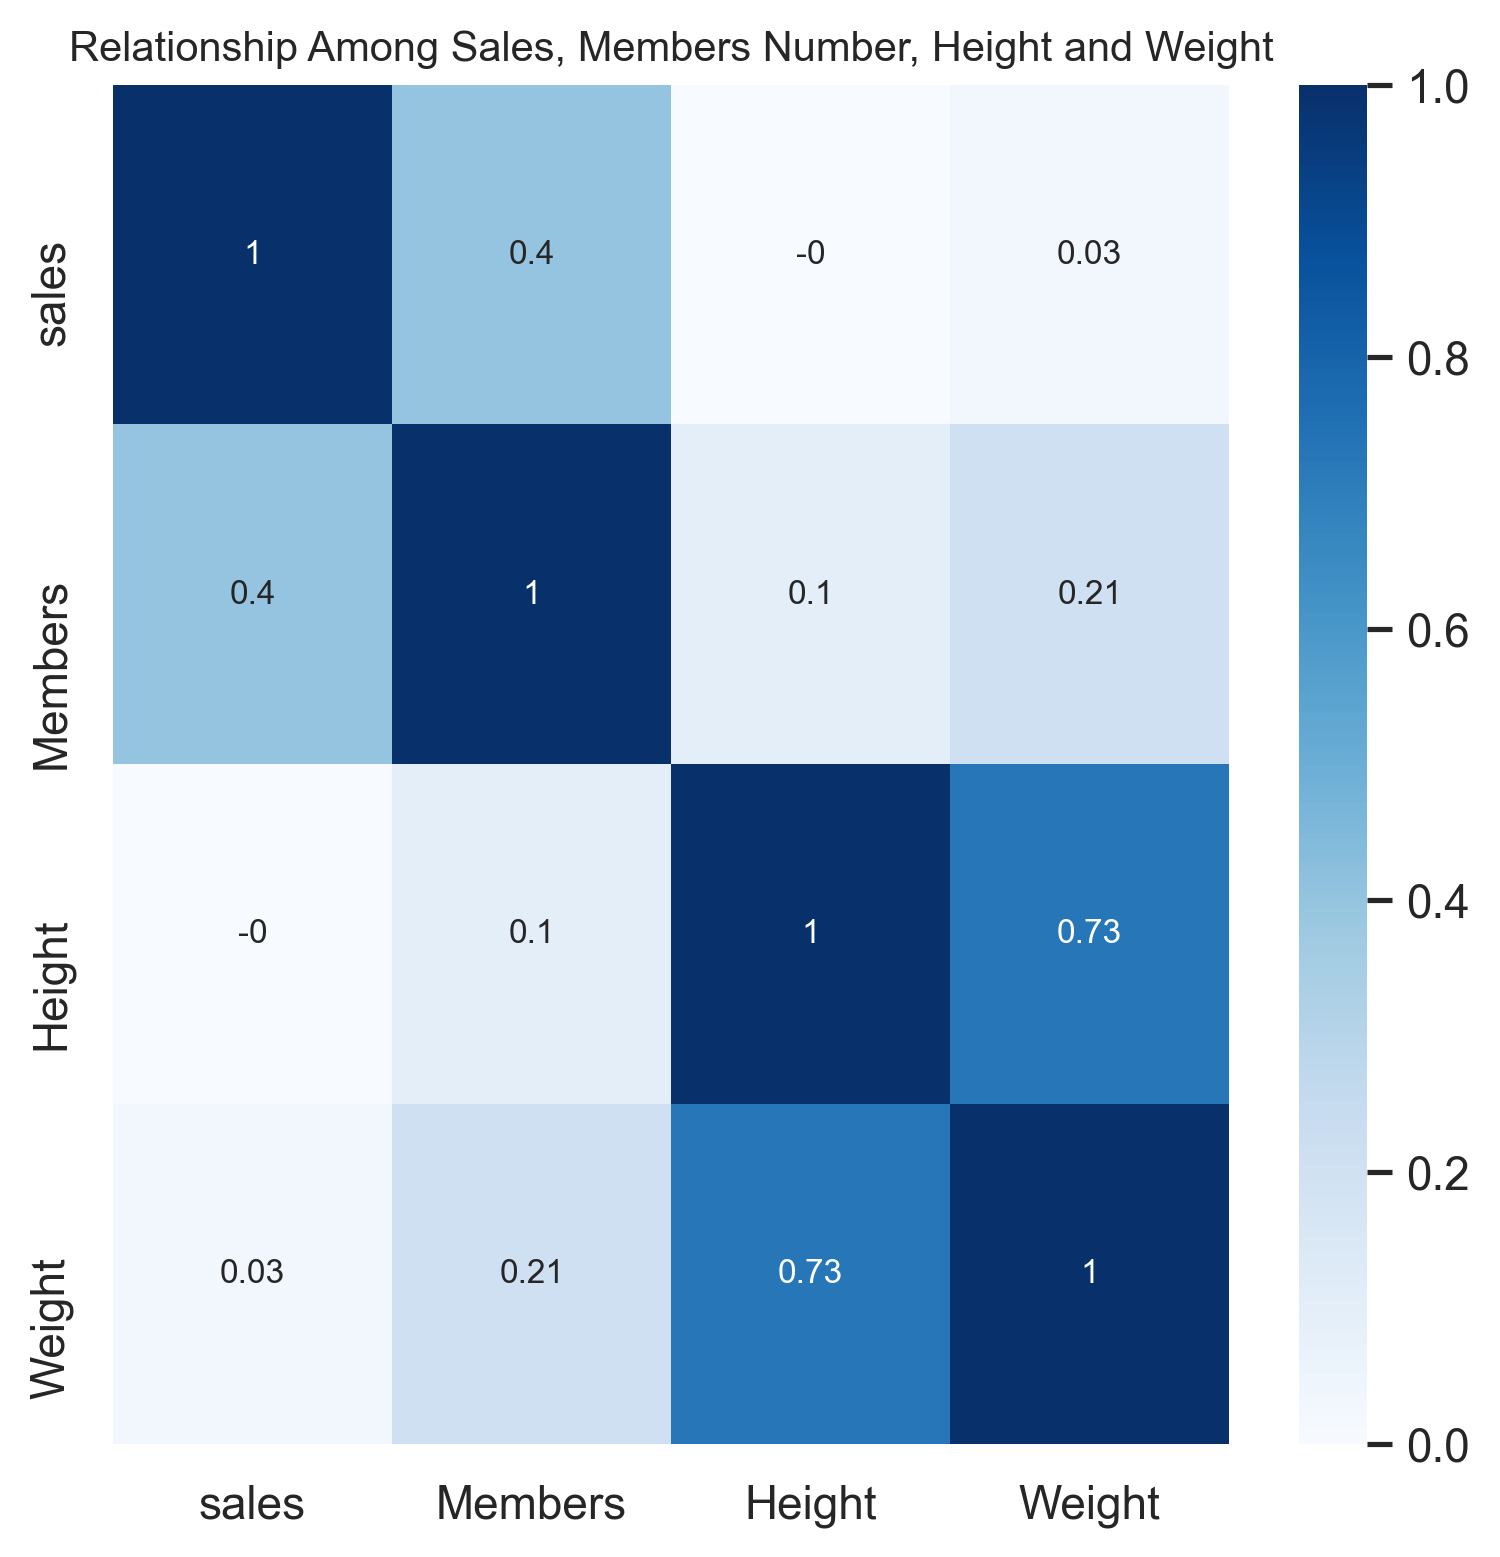

In [16]:
plt.figure(figsize=(6, 6), dpi=300)
sns.set(rc={"figure.figsize":(15, 7.5)})
sns.set_style("darkgrid", {'font.size':4})
sns.heatmap(round(
    data[["sales", "Members", "Height", "Weight"]].corr(), 2
), annot=True, cmap="Blues", annot_kws={"fontsize":8})
plt.title("Relationship Among Sales, Members Number, Height and Weight", fontsize=10)
plt.savefig("images/Relationship Among Sales, Members Number, Height and Weight.png")
plt.show()

In [17]:
X = data[["Members", "Height_avg", "Weight_avg"]]
y = data["sales"]
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                   OLS                 Adj. R-squared:        0.169     
Dependent Variable:      sales               AIC:                   15742.7038
Date:                    2023-04-28 20:42    BIC:                   15760.1903
No. Observations:        585                 Log-Likelihood:        -7867.4   
Df Model:                3                   F-statistic:           40.46     
Df Residuals:            581                 Prob (F-statistic):    9.34e-24  
R-squared:               0.173               Scale:                 2.8294e+10
------------------------------------------------------------------------------
              Coef.       Std.Err.      t    P>|t|      [0.025       0.975]   
------------------------------------------------------------------------------
const      2232499.3213 2824617.9612  0.7904 0.4296 -3315206.9570 7780205.5996
Members      26157.9466    4610.1601  5.6740 0.0000    17103.3366   35212.5567
Height_avg  -13493.8310   20131.6137 -0.6703 0.5029   -53033.4364   26045.7744
Weight_avg    1386.4815   12686.1558  0.1093 0.9130   -23529.8318   26302.7948
------------------------------------------------------------------------------
Omnibus:                 220.189           Durbin-Watson:              0.183  
Prob(Omnibus):           0.000             Jarque-Bera (JB):           867.764
Skew:                    1.713             Prob(JB):                   0.000  
Kurtosis:                7.885             Condition No.:              76934  
==============================================================================
* The condition number is large (8e+04). This might indicate
strong multicollinearity or other numerical problems.
"""